# 🧠 Project Tasks: Stock and Revenue Analysis

1. **Question 1:** Use `yfinance` to Extract Stock Data  
2. **Question 2:** Use Webscraping to Extract Tesla Revenue Data  
3. **Question 3:** Use `yfinance` to Extract Stock Data  
4. **Question 4:** Use Webscraping to Extract GME Revenue Data  
5. **Question 5:** Plot Tesla Stock Graph  
6. **Question 6:** Plot GameStop Stock Graph  


### STEP 1 (Q 1)

In [1]:
import yfinance as yf

In [2]:
# Create ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

In [4]:
# Extract stock history and save to DataFrame
tesla_data = tesla.history(period="max")

In [5]:
# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## STEP 2 (Q 2)

In [10]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
!pip install lxml


In [7]:
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm "

In [23]:
# Read all tables from the webpage
tables = pd.read_html(url_tesla)

In [24]:
# Check how many tables are found (optional)
print(f"Total tables found: {len(tables)}")

Total tables found: 6


In [25]:
# Extract the Tesla quarterly revenue table (usually at index 1)
tesla_revenue = tables[1]

In [26]:
# Rename columns to match expected format
tesla_revenue.columns = ["Date", "Revenue"]

In [27]:
# Clean the Revenue column (remove $ and commas)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

In [28]:
# Drop rows with missing or empty revenue
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

In [30]:
# Display the last  rows
tesla_revenue.tail(10)

,Date,Revenue
43,2011-12-31,39
44,2011-09-30,58
45,2011-06-30,58
46,2011-03-31,49
47,2010-12-31,36
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## STEP 3 (Q 3)

In [31]:
# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

In [32]:
# Extract historical stock data for the maximum available period
gme_data = gme_ticker.history(period="max")

In [36]:
# Reset the index so Date becomes a column instead of the index
gme_data.reset_index(inplace=True)

In [34]:
# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## STEP 4 (Q 4)

In [37]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


In [38]:
html_data_2 = requests.get(url).text

In [39]:
# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

In [40]:
# Use pandas to extract tables
tables = pd.read_html(html_data_2)

/tmp/ipykernel_1740/3633112057.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data_2)


In [41]:
# The GameStop revenue table is the second table (index 1)
gme_revenue = tables[1]

In [42]:
# Rename columns to 'Date' and 'Revenue' (if not already)
gme_revenue.columns = ["Date", "Revenue"]

In [43]:
# Clean the Revenue column (remove commas and dollar signs)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

In [44]:
# Remove null or empty values
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

In [45]:
# Display the last  rows
gme_revenue.tail(6)

,Date,Revenue
56,2006-04-30,1040
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## STEP 5 (Q 5)

In [ ]:
#!pip install matplotlib  # (first this one run)

In [49]:
import matplotlib.pyplot as plt

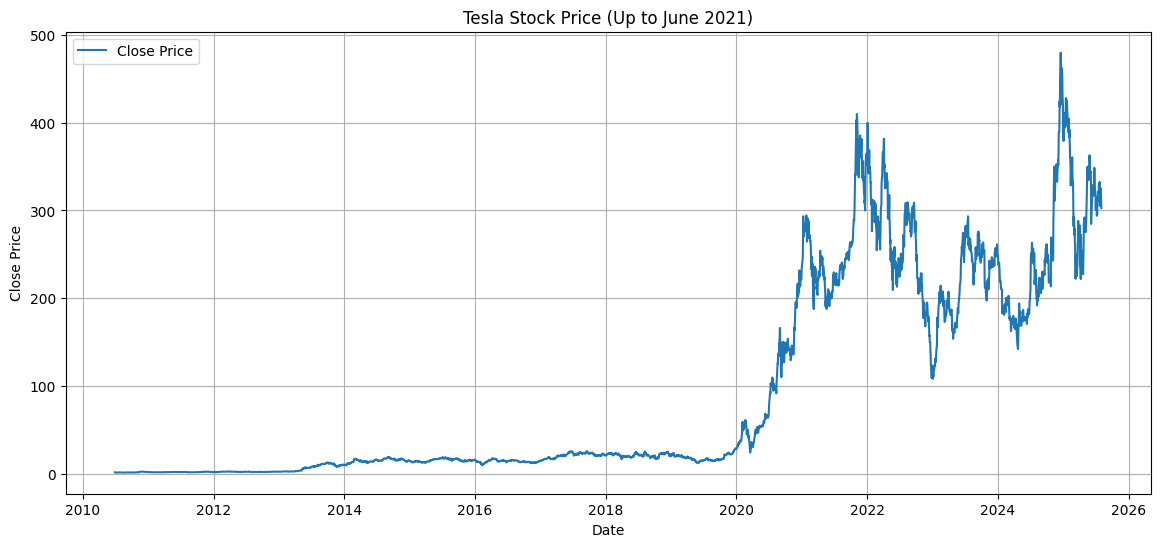

In [50]:
# Define the graphing function
def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with Tesla stock data
make_graph(tesla_data, "Tesla Stock Price (Up to June 2021)")


## STEP 6 (Q 6)

In [63]:
# Clean gme_data
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)  # Remove timezone
gme_data.sort_values('Date', inplace=True)

In [64]:
# Clean gme_revenue
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue.sort_values('Date', inplace=True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

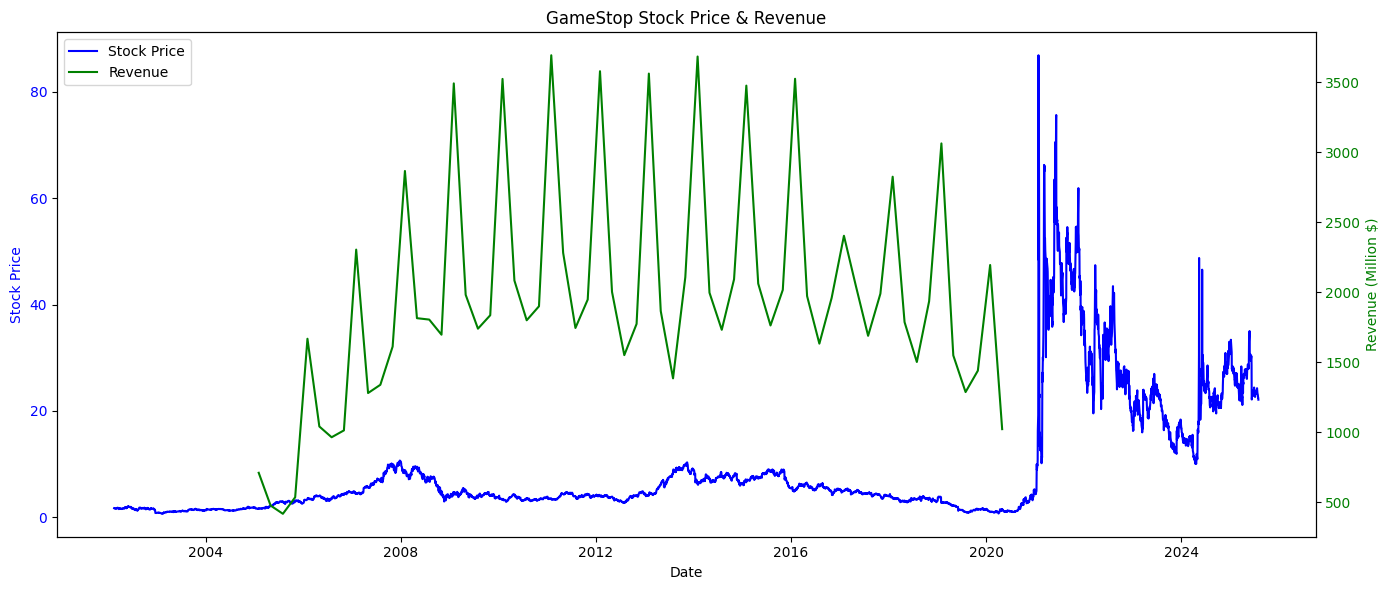

In [65]:
# Plotting function
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Stock price (left Y-axis)
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Revenue (right Y-axis)
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (Million $)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Title and combined legend
    plt.title(f"{stock} Stock Price & Revenue")
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()

# Run the plot
make_graph(gme_data, gme_revenue, 'GameStop')
